In [39]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\annbu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
used = pd.read_csv('used.csv')
used

,Unnamed: 0,name,price,square,num_of_room,poverh
0,0,NaN,220 000 $,95 м²,2,16
1,1,NaN,57 000 $,33 м²,1,3
2,2,NaN,100 000 $,45 м²,2,2
3,3,NaN,34 000 $,33 м²,1,5
4,4,NaN,73 700 $,67 м²,2,11
...,...,...,...,...,...,...
6638,6638,3 кімн в центрі Тургенівська 52/58,300 000 $,160 м²,1,4
6639,6639,"ЖК Файна Таун, 2 кімнатна, 48м2, видова, новий...",170 000 $,48 м²,1,4
6640,6640,"Без% Дизайнерская 2к 64м2 Гончара 75, м. Униве...",135 000 $,64 м²,1,4
6641,6641,"Видова 2-х кім кв. у Центрі, Львівська Площа, ...",185 000 $,80 м²,1,4


In [3]:
new = pd.read_csv('new.csv')
new

,Unnamed: 0,name,price,square,num_of_room,poverh
0,0,NaN,168 000 $,78 м²,2,12
1,1,NaN,60 000 $,42 м²,1,4
2,2,NaN,57 000 $,33 м²,1,3
3,3,NaN,100 000 $,45 м²,2,2
4,4,NaN,34 000 $,33 м²,1,5
...,...,...,...,...,...,...
6092,6092,"ЖК Creator City, Продажа 2 к квартиры, ЖК Unit...",162 361 $,69.09 м²,2,21
6093,6093,Продам Видову 2-к квартиру 82 м² ЖК Manhattan ...,135 990 $,81.90 м²,2,22
6094,6094,"ЖК Creator City, Продажа 2 к квартиры, ЖК Unit...",158 907 $,69.09 м²,2,18
6095,6095,"ЖК Creator City, Продажа 2 к квартиры, Лукьяновка",153 934 $,69.34 м²,2,11


In [4]:
used = used.drop(columns=['Unnamed: 0'])
new = new.drop(columns=['Unnamed: 0'])

In [5]:
used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643 entries, 0 to 6642
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1276 non-null   object
 1   price        6643 non-null   object
 2   square       6643 non-null   object
 3   num_of_room  6643 non-null   int64 
 4   poverh       6643 non-null   object
dtypes: int64(1), object(4)
memory usage: 259.6+ KB


In [6]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1192 non-null   object
 1   price        6097 non-null   object
 2   square       6097 non-null   object
 3   num_of_room  6097 non-null   object
 4   poverh       6097 non-null   object
dtypes: object(5)
memory usage: 238.3+ KB


In [7]:
# Замініть стрінгове значення на 0 в колонці 'poverh'
str_value_to_replace = 'Цокольний'
used['poverh'] = used['poverh'].apply(lambda x: 0 if x == str_value_to_replace else x)

In [8]:
# Перетворіть колонку 'poverh' в тип int
used['poverh'] = used['poverh'].astype(int)

In [9]:
used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643 entries, 0 to 6642
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1276 non-null   object
 1   price        6643 non-null   object
 2   square       6643 non-null   object
 3   num_of_room  6643 non-null   int64 
 4   poverh       6643 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 233.7+ KB


In [10]:
# Функція для виділення числа з рядка
def extract_number(text):
    match = re.search(r'\d+', text)  # Знайти числа у рядку
    if match:
        return int(match.group())  # Повернути перше знайдене число
    return None  # Повернути None, якщо числа не знайдено

# Застосуйте функцію до колонки зі стрінговими значеннями
used['square'] = used['square'].apply(extract_number)
used['price'] = used['price'].apply(extract_number)

In [11]:
used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643 entries, 0 to 6642
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1276 non-null   object
 1   price        6643 non-null   int64 
 2   square       6643 non-null   int64 
 3   num_of_room  6643 non-null   int64 
 4   poverh       6643 non-null   int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 233.7+ KB


In [28]:
# Виведіть кількість кожного унікального значення у колонці 'num_of_room'
new['num_of_room'].value_counts()

2     2196
1     2043
3     1280
4      394
5      128
6       31
5+      11
7        7
10       5
9        2
Name: num_of_room, dtype: int64

In [27]:
# Визначте підмножину, де значення більше 5 в колонці 'num_of_room', але виключіть значення '5+'
subset = new[(new['num_of_room'] != '5+') & new['num_of_room'].str.isnumeric()]

# Обчисліть середнє значення цієї підмножини
average_value = subset['num_of_room'].astype(int).mean()

# Замініть всі значення "5+" у колонці 'num_of_room' на середнє значення
new.loc[new['num_of_room'] == '5+', 'num_of_room'] = average_value

# Перетворення з типу об'єкт до int
new['num_of_room'] = new['num_of_room'].astype(int)

In [28]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1192 non-null   object
 1   price        6097 non-null   object
 2   square       6097 non-null   object
 3   num_of_room  6097 non-null   int32 
 4   poverh       6097 non-null   object
dtypes: int32(1), object(4)
memory usage: 214.5+ KB


In [31]:
new['poverh'] = new['poverh'].apply(lambda x: 0 if x == str_value_to_replace else x)
new['poverh'] = new['poverh'].astype(int)

In [32]:
new['square'] = new['square'].apply(extract_number)
new['price'] = new['price'].apply(extract_number)

In [33]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1192 non-null   object
 1   price        6097 non-null   int64 
 2   square       6097 non-null   int64 
 3   num_of_room  6097 non-null   int32 
 4   poverh       6097 non-null   int32 
dtypes: int32(2), int64(2), object(1)
memory usage: 190.7+ KB


In [37]:
# Додайте колонку 'стан' до обох датасетів і заповніть її значеннями 1 і 0 відповідно
new['state'] = 1
used['state'] = 0

# Об'єднайте обидва датасети за допомогою методу concat
data = pd.concat([new, used])

In [38]:
data

,name,price,square,num_of_room,poverh,state
0,NaN,168,78,2,12,1
1,NaN,60,42,1,4,1
2,NaN,57,33,1,3,1
3,NaN,100,45,2,2,1
4,NaN,34,33,1,5,1
...,...,...,...,...,...,...
6638,3 кімн в центрі Тургенівська 52/58,300,160,1,4,0
6639,"ЖК Файна Таун, 2 кімнатна, 48м2, видова, новий...",170,48,1,4,0
6640,"Без% Дизайнерская 2к 64м2 Гончара 75, м. Униве...",135,64,1,4,0
6641,"Видова 2-х кім кв. у Центрі, Львівська Площа, ...",185,80,1,4,0


In [44]:
#видалення дублікатів
data = data.drop_duplicates()

             price        square   num_of_room       poverh        state
count  9860.000000    9860.00000   9860.000000  9860.000000  9860.000000
mean    181.206085     105.50355     10.926775     8.614199     0.482556
std     139.850316    1637.45131    876.137660     6.648938     0.499721
min       1.000000       1.00000      1.000000     0.000000     0.000000
25%      94.000000      50.00000      1.000000     4.000000     0.000000
50%     145.500000      70.00000      2.000000     6.000000     0.000000
75%     215.000000      95.00000      3.000000    13.000000     1.000000
max     999.000000  115000.00000  87000.000000    36.000000     1.000000


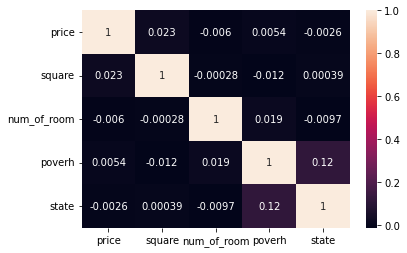

Mean Squared Error: 21098.40264662594
R-squared: -0.0013483256423560963


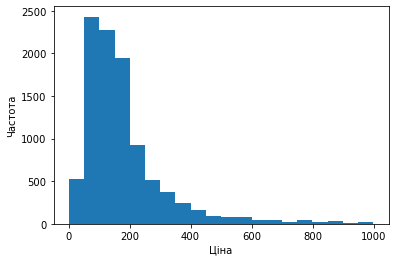

In [49]:
# Описовий аналіз
print(data.describe())



# Кореляційний аналіз
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Регресійний аналіз
X = data[['square', 'num_of_room', 'poverh', 'state']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Аналіз розподілу цін
plt.hist(data['price'], bins=20)
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9860 entries, 0 to 6639
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1970 non-null   object
 1   price        9860 non-null   int64 
 2   square       9860 non-null   int64 
 3   num_of_room  9860 non-null   int64 
 4   poverh       9860 non-null   int32 
 5   state        9860 non-null   int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 758.7+ KB
